In [1]:
%matplotlib inline

# Default imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing/model evaluation imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Dimensionality reduction imports
from sklearn.decomposition import PCA

# Neural network imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical

###################### For Tensorflow-GPU ##########################
# Only works with a NVIDIA GPU and the necessary drivers installed #
#   Most of you won't have this, so don't enable this unless you   #
#  you know what you're doing! (Otherwise it will give an error)   #
####################################################################
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
# Read in the MNIST dataset
mnist = pd.read_csv("data/MNIST.csv")

In [3]:
# Split into features and targets
X=mnist.drop('label',axis=1)
y=mnist.label

# Split into a training and a test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Convert the categorical train_targets to one-hot-encoded vectors
y_train_encoded=to_categorical(y_train)

In [4]:
# To show you what we did in the last step, let's take a look at the difference between y_train and y_train_encoded
print("Before encoding")
display(y_train[0:10])
print("-"*79)
print("After encoding")
display(y_train_encoded[0:10])

# We now have 10 possible outputs where everything is 0 except for the category we want!

Before encoding


32815    2
28452    0
15739    2
23449    1
21279    6
13996    9
17366    3
23284    1
27667    5
1224     4
Name: label, dtype: int64

-------------------------------------------------------------------------------
After encoding


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [5]:
# Settings for the neural network
activation = 'relu'
dropout_rate = 0.2
kernel_initializer = 'uniform'
optimizer = 'adam'
batchsize = 100

# Initialize a sequential model
model = Sequential()

#---------- Layer 1 ------------
model.add(Dense(units=64,input_dim=784,kernel_initializer=kernel_initializer))
model.add(Dropout(dropout_rate))
#---------- Layer 2 ------------
model.add(Dense(units=64,kernel_initializer=kernel_initializer,activation=activation))
model.add(Dropout(dropout_rate))
#-------- Output layer ---------
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"],
              )

In [6]:
# Show a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


The model will look something like this.

(4 * scaled down, 16 neurons instead of 64 for middle layers, input layer 196 neurons instead of 784)

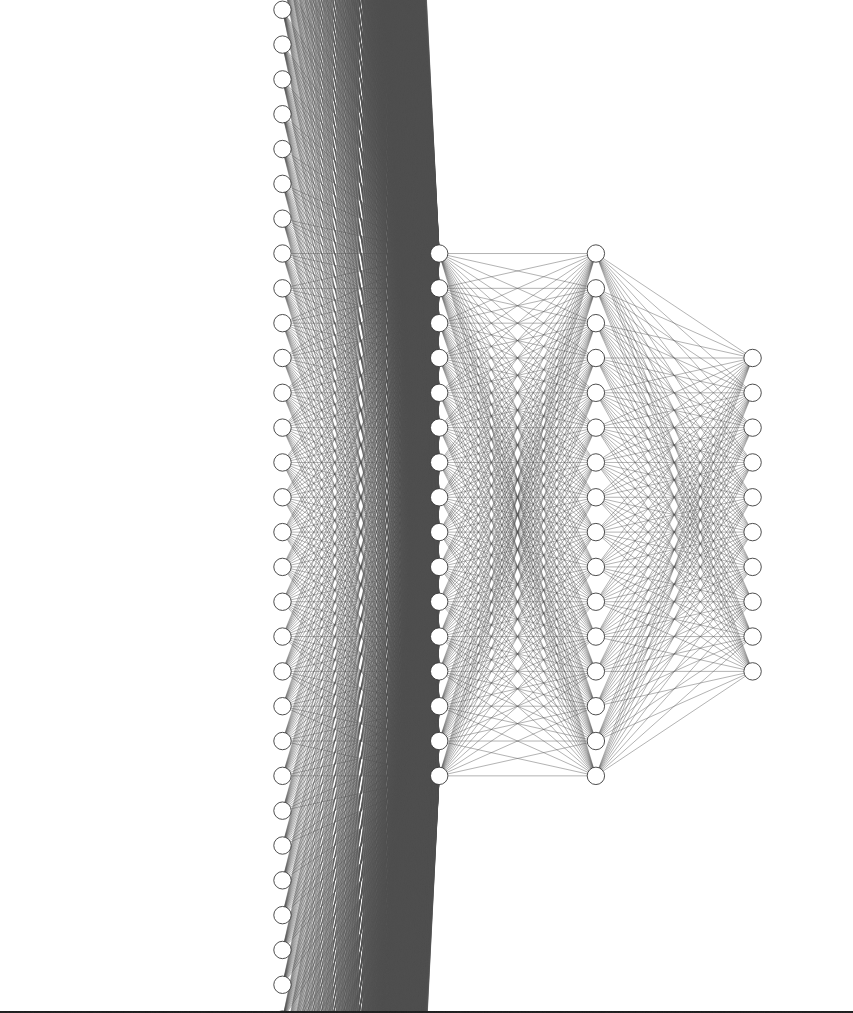

In [7]:
# Train the model
# We will store the loss and accuracy values during training in 'history'
# We will train the model 100 times on the entire training set.
# We keep 30% of the data for validation testing (not the test set!)

history = model.fit(X_train,
                    y_train_encoded,
                    epochs=100,
                    validation_split=0.3,
                    batch_size=batchsize,
                    verbose=1)

Epoch 1/100
236/236 [==============================] - 5s 14ms/step - loss: 3.2889 - accuracy: 0.5414 - val_loss: 0.4868 - val_accuracy: 0.8514
Epoch 2/100
236/236 [==============================] - 1s 6ms/step - loss: 0.6961 - accuracy: 0.8050 - val_loss: 0.3674 - val_accuracy: 0.9128
Epoch 3/100
236/236 [==============================] - 1s 6ms/step - loss: 0.5541 - accuracy: 0.8433 - val_loss: 0.3407 - val_accuracy: 0.9128
Epoch 4/100
236/236 [==============================] - 1s 5ms/step - loss: 0.4956 - accuracy: 0.8612 - val_loss: 0.3067 - val_accuracy: 0.9168
Epoch 5/100
236/236 [==============================] - 1s 5ms/step - loss: 0.4498 - accuracy: 0.8705 - val_loss: 0.3082 - val_accuracy: 0.9214
Epoch 6/100
236/236 [==============================] - 1s 5ms/step - loss: 0.4454 - accuracy: 0.8747 - val_loss: 0.2903 - val_accuracy: 0.9115
Epoch 7/100
236/236 [==============================] - 1s 6ms/step - loss: 0.3987 - accuracy: 0.8873 - val_loss: 0.2393 - val_accuracy: 0.932

Epoch 58/100
236/236 [==============================] - 1s 6ms/step - loss: 0.2235 - accuracy: 0.9386 - val_loss: 0.2603 - val_accuracy: 0.9419
Epoch 59/100
236/236 [==============================] - 1s 6ms/step - loss: 0.2316 - accuracy: 0.9333 - val_loss: 0.2598 - val_accuracy: 0.9407
Epoch 60/100
236/236 [==============================] - 1s 6ms/step - loss: 0.2351 - accuracy: 0.9320 - val_loss: 0.2613 - val_accuracy: 0.9417
Epoch 61/100
236/236 [==============================] - 1s 6ms/step - loss: 0.2245 - accuracy: 0.9358 - val_loss: 0.2393 - val_accuracy: 0.9448
Epoch 62/100
236/236 [==============================] - 1s 6ms/step - loss: 0.2185 - accuracy: 0.9337 - val_loss: 0.2604 - val_accuracy: 0.9443
Epoch 63/100
236/236 [==============================] - 1s 6ms/step - loss: 0.2347 - accuracy: 0.9352 - val_loss: 0.2825 - val_accuracy: 0.9420
Epoch 64/100
236/236 [==============================] - 1s 6ms/step - loss: 0.2201 - accuracy: 0.9366 - val_loss: 0.2601 - val_accuracy:

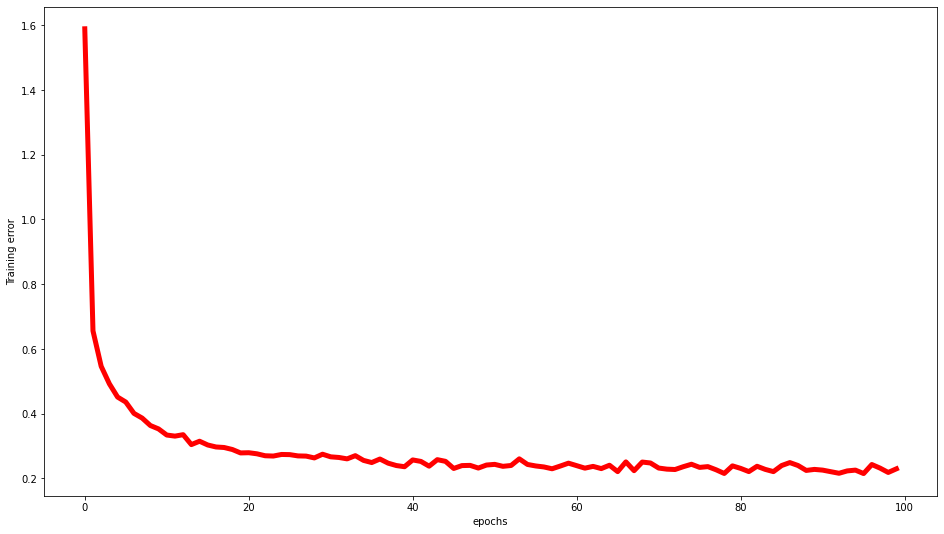

In [8]:
# Plot the loss (= metric of error) during training
fig = plt.figure(figsize=(16,9))
plt.plot(history.history['loss'],'red',linewidth=5.0)

plt.xlabel('epochs')
plt.ylabel('Training error')
plt.show()

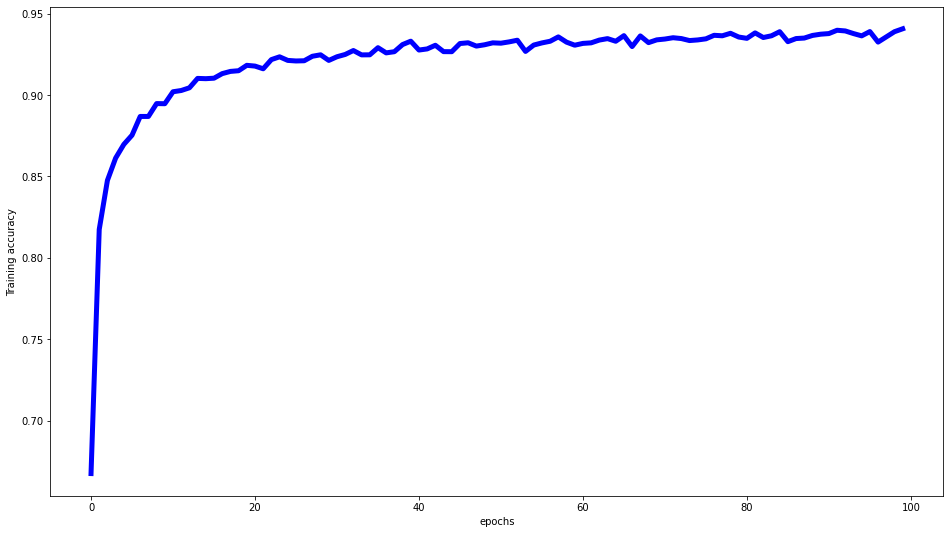

In [9]:
# Plot the accuracy of our model during training
fig = plt.figure(figsize=(16,9))
plt.plot(history.history['accuracy'],'blue',linewidth=5.0)

plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.show()

In [13]:
np.argmax([[0,5,7,2,3],[8,2,4,1,3]],axis=1)

array([2, 0], dtype=int64)

In [14]:
# Now we can validate our model on the test set!

# Predict the labels of the test set using our neural network
# Not the np.argmax(..., axis 1). This will return the index of the highest value (in our case probability of softmax)
# For example: [[0,5,9,2,3],[8,2,4,1,3]] will return [2,0]
y_pred=np.argmax(model.predict(X_test), axis=1)

In [15]:
# Let's show the predicted labels versus the actual labels to see if we see big or small differences
# Let's only show 20
print(y_pred[0:20])
print(y_test.values[0:20])

[9 7 2 7 7 6 0 2 1 1 8 1 3 9 7 0 2 8 0 4]
[0 7 3 7 7 6 0 2 1 1 8 1 3 9 7 0 2 8 0 4]


In [16]:
# Print the confusion matrix and classification report
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("="*79)
print("Classification report")
print(classification_report(y_test,y_pred))

Confusion matrix
[[825   0   1   0   0   0   0   0  21   5]
 [  0 888   3   1   2   4   0   1  20   0]
 [  4   4 779  11  10   0   1  16  21   7]
 [  2   0  15 755   0  12   0  16  23   3]
 [  2   2   0   0 756   0   2   1   9  38]
 [  3   1   1  17   0 680   6   7  21  16]
 [ 13   0   3   0   7  18 767   0  20   1]
 [  0   3   7   5   5   1   0 802   7  13]
 [  6   3   3   8   3   8   0   0 801   9]
 [  3   0   0   8   9   2   0  22  11 820]]
Classification report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       852
           1       0.99      0.97      0.98       919
           2       0.96      0.91      0.94       853
           3       0.94      0.91      0.93       826
           4       0.95      0.93      0.94       810
           5       0.94      0.90      0.92       752
           6       0.99      0.93      0.96       829
           7       0.93      0.95      0.94       843
           8       0.84      0.95      0.89

## Neural network on PCA transforms
Now we had 784 input neurons, this is quite a lot. What if we first reduce this using a PCA with 40 components?

In [17]:
# Transform the data using PCA
number_of_components = 40 
PCA_model = PCA(number_of_components)

X_train_PCA=PCA_model.fit_transform(X_train)
X_test_PCA = PCA_model.transform(X_test)

In [18]:
# Settings for the neural network
activation = 'relu'
dropout_rate = 0.2
kernel_initializer = 'uniform'
optimizer = 'adam'
batchsize = 100


# Initialize a sequential model
model = Sequential()

#---------- Layer 1 ------------
model.add(Dense(units=64,input_dim=number_of_components,kernel_initializer=kernel_initializer))
model.add(Dropout(dropout_rate))
#---------- Layer 2 ------------
model.add(Dense(units=64,kernel_initializer=kernel_initializer,activation=activation))
model.add(Dropout(dropout_rate))
#-------- Output layer ---------
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"],
              )

In [19]:
# Show a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                2624      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 7,434
Trainable params: 7,434
Non-trainable params: 0
_________________________________________________________________


The structure of the model
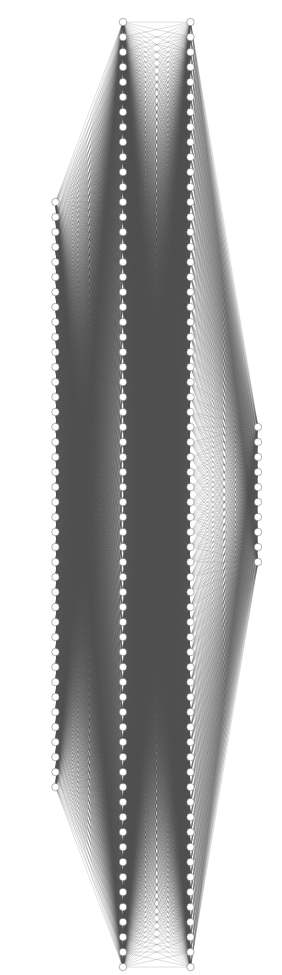

In [20]:
# Train the model
history = model.fit(X_train_PCA,
                    y_train_encoded,
                    epochs=100,
                    validation_split=0.3,
                    batch_size=batchsize,
                    verbose=1)

Epoch 1/100
236/236 [==============================] - 2s 8ms/step - loss: 3.5318 - accuracy: 0.6797 - val_loss: 0.3621 - val_accuracy: 0.9223
Epoch 2/100
236/236 [==============================] - 2s 7ms/step - loss: 0.6821 - accuracy: 0.8525 - val_loss: 0.2456 - val_accuracy: 0.9338
Epoch 3/100
236/236 [==============================] - 2s 7ms/step - loss: 0.5011 - accuracy: 0.8740 - val_loss: 0.2107 - val_accuracy: 0.9407
Epoch 4/100
236/236 [==============================] - 2s 7ms/step - loss: 0.3879 - accuracy: 0.8882 - val_loss: 0.1820 - val_accuracy: 0.9466
Epoch 5/100
236/236 [==============================] - 2s 9ms/step - loss: 0.3532 - accuracy: 0.8967 - val_loss: 0.1791 - val_accuracy: 0.9460
Epoch 6/100
236/236 [==============================] - 2s 10ms/step - loss: 0.3348 - accuracy: 0.8990 - val_loss: 0.1777 - val_accuracy: 0.9490
Epoch 7/100
236/236 [==============================] - 2s 9ms/step - loss: 0.3132 - accuracy: 0.9109 - val_loss: 0.1825 - val_accuracy: 0.944

Epoch 58/100
236/236 [==============================] - 2s 7ms/step - loss: 0.2350 - accuracy: 0.9291 - val_loss: 0.1475 - val_accuracy: 0.9556
Epoch 59/100
236/236 [==============================] - 2s 6ms/step - loss: 0.2359 - accuracy: 0.9301 - val_loss: 0.1432 - val_accuracy: 0.9562
Epoch 60/100
236/236 [==============================] - 2s 7ms/step - loss: 0.2391 - accuracy: 0.9277 - val_loss: 0.1401 - val_accuracy: 0.9597
Epoch 61/100
236/236 [==============================] - 1s 6ms/step - loss: 0.2429 - accuracy: 0.9259 - val_loss: 0.1455 - val_accuracy: 0.9579
Epoch 62/100
236/236 [==============================] - 2s 7ms/step - loss: 0.2346 - accuracy: 0.9296 - val_loss: 0.1425 - val_accuracy: 0.9578
Epoch 63/100
236/236 [==============================] - 2s 7ms/step - loss: 0.2349 - accuracy: 0.9283 - val_loss: 0.1528 - val_accuracy: 0.9546
Epoch 64/100
236/236 [==============================] - 2s 7ms/step - loss: 0.2416 - accuracy: 0.9264 - val_loss: 0.1415 - val_accuracy:

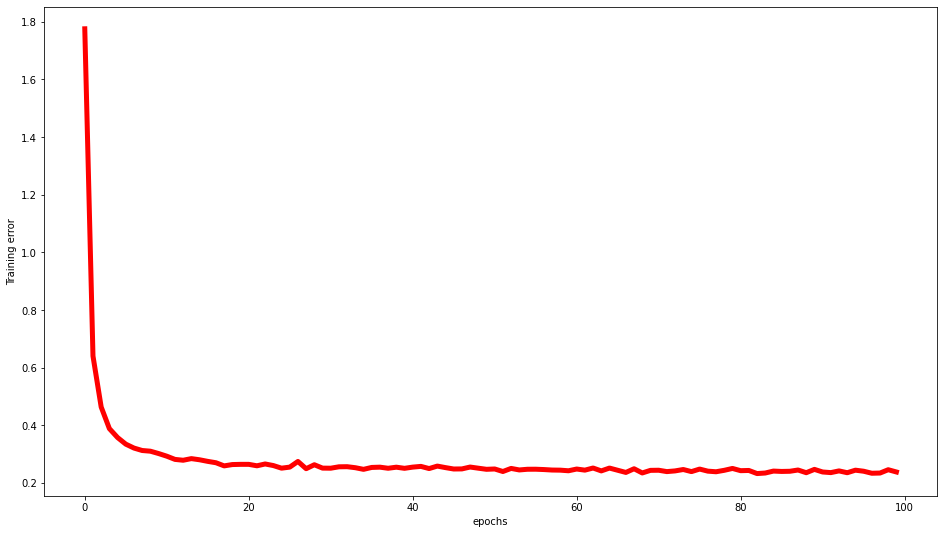

In [21]:
# Plot the loss
fig = plt.figure(figsize=(16,9))
plt.plot(history.history['loss'],'red',linewidth=5.0)

plt.xlabel('epochs')
plt.ylabel('Training error')
plt.show()

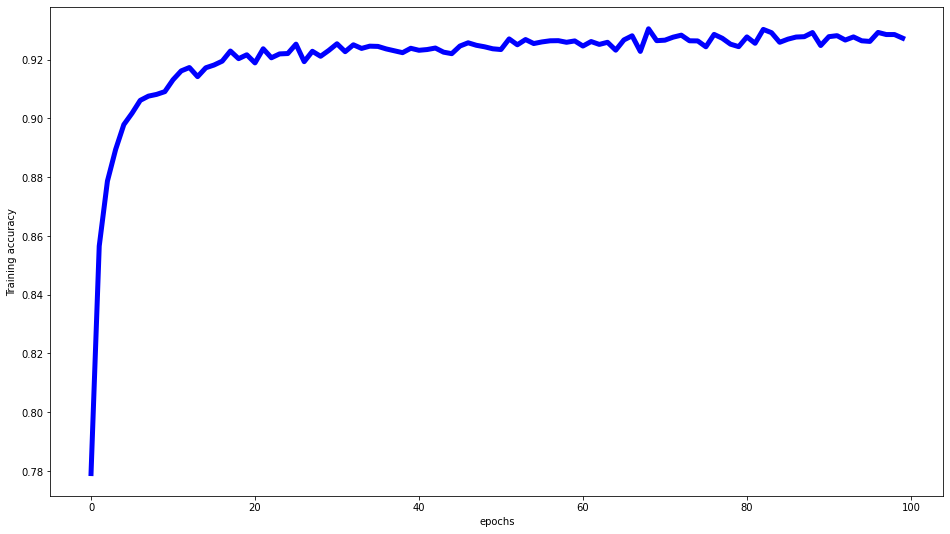

In [22]:
# Plot the accuracy
fig = plt.figure(figsize=(16,9))
plt.plot(history.history['accuracy'],'blue',linewidth=5.0)

plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.show()

In [23]:
# Predict using our model 
# (note that we also needed to transform our testing data with PCA)
y_pred=np.argmax(model.predict(X_test_PCA), axis=-1)

In [24]:
# Print confusion matrix and classification report
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("="*79)
print("Classification report")
print(classification_report(y_test,y_pred))

Confusion matrix
[[836   0   3   1   1   0   5   1   2   3]
 [  0 902   2   1   1   0   0   3   9   1]
 [  1   3 817   1  11   0   2  12   4   2]
 [  1   2  18 757   1  11   1  13  15   7]
 [  0   0   2   0 790   0   3   0   1  14]
 [  1   2   4  12   2 707   1   1  11  11]
 [  4   0   2   0   1   5 814   0   3   0]
 [  1   5   3   4   6   0   0 812   0  12]
 [  1   2   5   6   3  10   3   6 799   6]
 [  3   0   0   5  15   1   1  18   9 823]]
Classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       852
           1       0.98      0.98      0.98       919
           2       0.95      0.96      0.96       853
           3       0.96      0.92      0.94       826
           4       0.95      0.98      0.96       810
           5       0.96      0.94      0.95       752
           6       0.98      0.98      0.98       829
           7       0.94      0.96      0.95       843
           8       0.94      0.95      0.94

Note that this is actually performing slightly better than without PCA. This is because a lot of the noise is actually filtered out by the PCA.

## Grid search and hyperparameter tuning
You can also perform a gridsearch but this will take a long time, since there is lot to train and there are loas of additional hyperparameters to tune!

In [ ]:
# A function for a standard model that we can tune using the parameters of the function
def create_model(optimizer='adam',activation = 'relu',dropout_rate = 0.0, kernel_initializer='uniform',neurons = 10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=number_of_components, kernel_initializer=kernel_initializer,activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, kernel_initializer=kernel_initializer,activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10,activation = 'softmax'))
    model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"]) 
    return model

In [ ]:
# Additional imports for gridsearch
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Create a kerasclassifier with a build function (build_fn)
model = KerasClassifier(build_fn=create_model,batch_size=batchsize, epochs =10)

# A selection of parameters that we could use to tune the model

# Hyperparameters for the actual model
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
#momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
#learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1]
#weight_constraint=[1, 2, 3, 4, 5]
neurons = [5, 10, 20, 30, 40 ,50]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'Adam']
#optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Hyperparameters for the training of the model
epochs = [50] # add 50, 100, 150 etc
batch_size = [16, 32] # add 5, 10, 20, 40, 60, 80, 100 etc

# The dictionary with all the settings
param_grid = dict(epochs=epochs, batch_size=batch_size,optimizer = optimizer, dropout_rate = dropout_rate)


##############################################################
# Create a gridsearchCV
grid = GridSearchCV(estimator=model, param_grid = param_grid)
# Train the gridsearchCV
grid_result = grid.fit(X_train_PCA, y_train) 


# Extra
## Convolutional Neural Network on MNIST

In [25]:
# Extra imports needed for the CNN
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten

In [26]:
# Read in the data
df = pd.read_csv("data/MNIST.csv")

In [27]:
# Split into features and targets set
X=df.drop("label",axis=1).values
y=df.label.values

In [28]:
# Reshape all features into 2D arrays of 28 by 28.
X=X.reshape((len(X),28,28,1))

#       Image 1              Image 2
# [[p1, p2, ..., p784],[p1, p2, ..., p784],...]

# => converted to =>

# [    Image 1
#  [[p1, p2, ..., p28],
#   [p29, p30, ..., p56],
#   ...
#   [p756, p757, ..., p784]],
#      Image 2
#  [[p1, p2, ..., p28],
#   [p29, p30, ..., p56],
#   ...
#   [p756, p757, ..., p784]],
#  ...
# ]

In [29]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Convert labels to categorical one-hot-encoded vectors
y_train_cat=to_categorical(y_train)

In [30]:
# Parameters
batch_size = 32
epochs = 100
num_classes = 10
img_rows,img_cols=28,28
input_shape=(img_rows,img_cols,1) # Note, this last "1" is because its black and white. 
                                  # If we had RGB, you would need to convert our data into (28,28,3) where it will become
                                  # A 3D array with each third dimension representing a color

# Initialize the sequential model
model=Sequential()
#---------- Layer 1 ------------
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
#---------- Layer 2 ------------
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
#---------- Convert ------------
# Convert CNN to a Fully connected Neural Network
model.add(Flatten())
#---------- Layer 3 ------------
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
#-------- Output layer ---------
model.add(Dense(num_classes,activation='softmax'))
#-------------------------------

#Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 32)         

Structure of the CNN
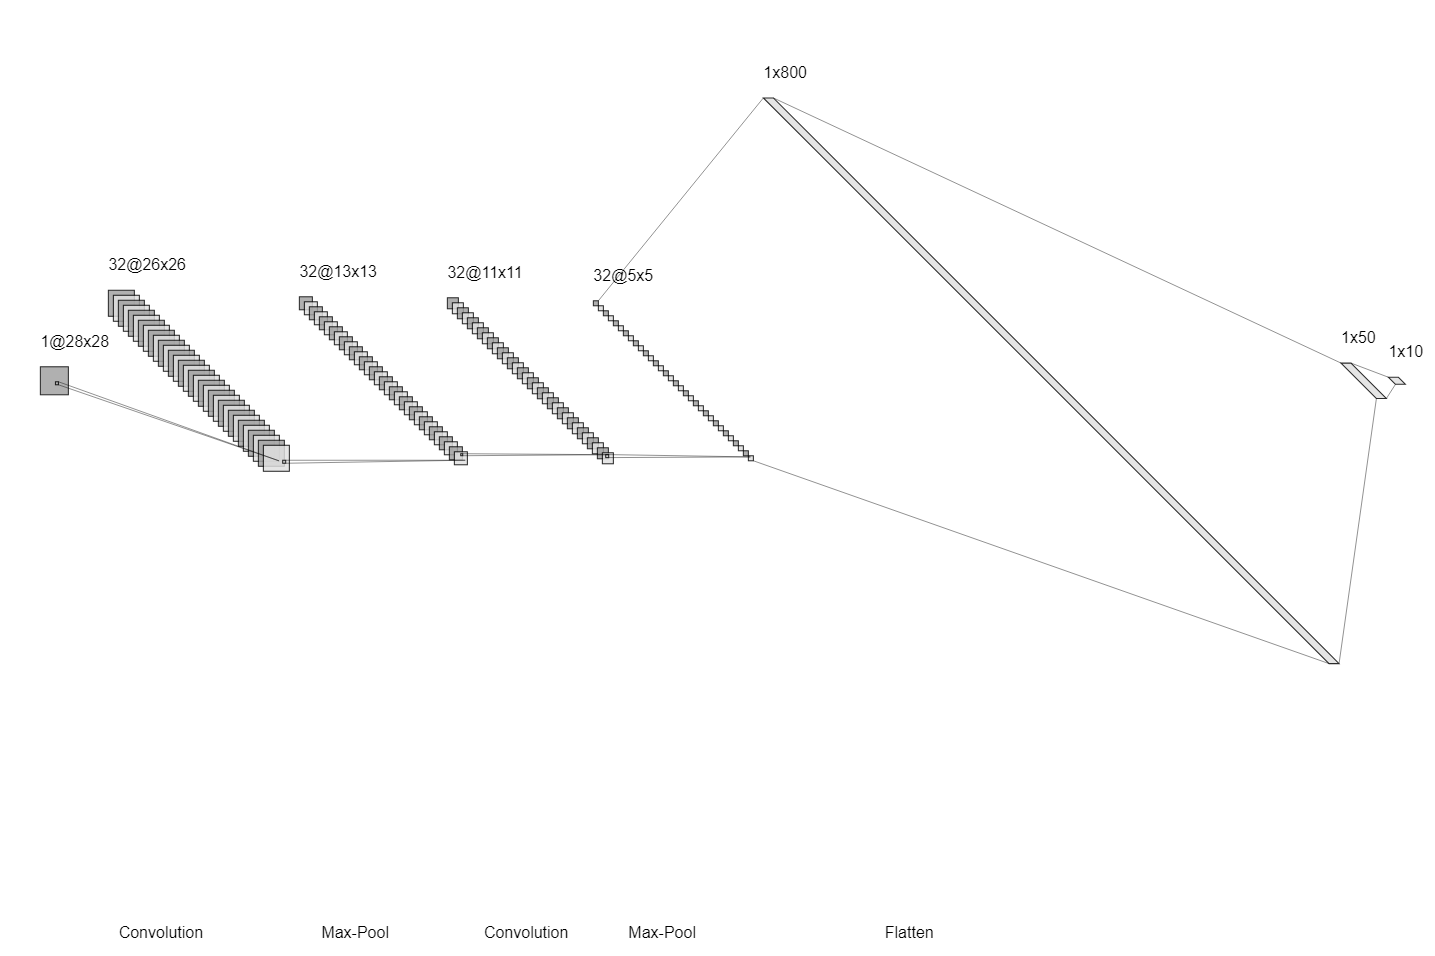

Or another way of displaying it
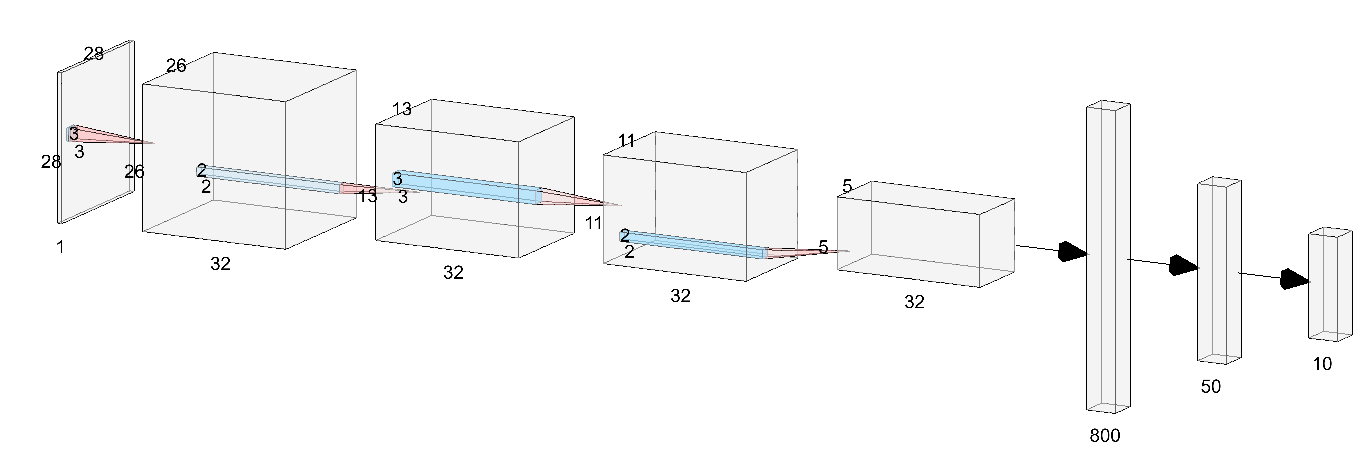

In [32]:
# Trainen van het CNN
history = model.fit(X_train, y_train_cat,
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/100
644/644 [==============================] - 14s 8ms/step - loss: 0.8197 - accuracy: 0.7289 - val_loss: 0.1003 - val_accuracy: 0.9667
Epoch 2/100
644/644 [==============================] - 5s 8ms/step - loss: 0.1714 - accuracy: 0.9506 - val_loss: 0.0830 - val_accuracy: 0.9729
Epoch 3/100
644/644 [==============================] - 5s 8ms/step - loss: 0.1175 - accuracy: 0.9612 - val_loss: 0.0663 - val_accuracy: 0.9788
Epoch 4/100
644/644 [==============================] - 5s 8ms/step - loss: 0.0963 - accuracy: 0.9694 - val_loss: 0.0542 - val_accuracy: 0.9825
Epoch 5/100
644/644 [==============================] - 5s 8ms/step - loss: 0.0860 - accuracy: 0.9734 - val_loss: 0.0511 - val_accuracy: 0.9847
Epoch 6/100
644/644 [==============================] - 5s 8ms/step - loss: 0.0863 - accuracy: 0.9741 - val_loss: 0.0588 - val_accuracy: 0.9806
Epoch 7/100
644/644 [==============================] - 5s 8ms/step - loss: 0.0651 - accuracy: 0.9782 - val_loss: 0.0483 - val_accuracy: 0.984

644/644 [==============================] - 6s 9ms/step - loss: 0.0246 - accuracy: 0.9932 - val_loss: 0.0448 - val_accuracy: 0.9878
Epoch 58/100
644/644 [==============================] - 6s 10ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0390 - val_accuracy: 0.9896
Epoch 59/100
644/644 [==============================] - 6s 9ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0417 - val_accuracy: 0.9891
Epoch 60/100
644/644 [==============================] - 6s 9ms/step - loss: 0.0227 - accuracy: 0.9921 - val_loss: 0.0386 - val_accuracy: 0.9901
Epoch 61/100
644/644 [==============================] - 6s 9ms/step - loss: 0.0210 - accuracy: 0.9925 - val_loss: 0.0445 - val_accuracy: 0.9902
Epoch 62/100
644/644 [==============================] - 6s 10ms/step - loss: 0.0204 - accuracy: 0.9926 - val_loss: 0.0408 - val_accuracy: 0.9914
Epoch 63/100
644/644 [==============================] - 6s 10ms/step - loss: 0.0217 - accuracy: 0.9915 - val_loss: 0.0412 - val_accuracy: 0.9897
Ep

In [33]:
y_pred=np.argmax(model.predict(X_test), axis=-1)

In [34]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("="*79)
print("Classification report")
print(classification_report(y_test,y_pred))

Confusion matrix
[[1235    0    0    0    0    1    4    0    0    1]
 [   0 1400    0    0    0    0    1    2    0    0]
 [   0    0 1229    1    0    0    0   10    3    0]
 [   1    0    1 1262    0    6    0    4    2    3]
 [   0    5    1    0 1215    0    1    4    0    5]
 [   0    0    0    3    0 1150    2    0    2    2]
 [   2    0    0    0    2    2 1239    0    1    0]
 [   0    3    6    0    1    1    0 1315    0    0]
 [   3    2    3    1    2    2    2    0 1189    5]
 [   6    1    0    0    4    1    0    5    1 1245]]
Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1241
           1       0.99      1.00      1.00      1403
           2       0.99      0.99      0.99      1243
           3       1.00      0.99      0.99      1279
           4       0.99      0.99      0.99      1231
           5       0.99      0.99      0.99      1159
           6       0.99      0.99      0.99      12